In [272]:
import numpy as np
np.seterr(all='raise')

import pint
si = pint.UnitRegistry()


In [273]:
from matplotlib import pyplot
si.setup_matplotlib()

In [274]:
%run mpdata.ipynb

In [275]:
%run coord.ipynb

In [297]:
def plot_done(title):
    pyplot.title(title)
    pyplot.grid()
    pyplot.legend()
    pyplot.show()
    
def plot_pdfr(r_min, r_max, cdf):
    cdfarg = np.linspace(r_min.magnitude, r_max.magnitude, 1000) * r_min.units
    x = cdfarg[0:-1] + (cdfarg[1:] - cdfarg[0:-1])/2
    y = np.diff(cdf(cdfarg)) / np.diff(cdfarg.magnitude)
    pyplot.plot(x, y)
    
def plot_step(r, pdf, t):
    pyplot.step(r, pdf, linestyle='-', where='mid', label=str(t))

In [298]:
nr = 64
nt = 32
dt = .4 * si.second
r_min = 50 * si.micrometre
r_max = 75 * si.micrometre
r_mid = r_min + .2*(r_max - r_min) 
cdf0 = lambda r: np.arctan((r-r_mid).magnitude) # Witch of Agnesi
drdt = lambda r: .5 * si.micrometre / si.second

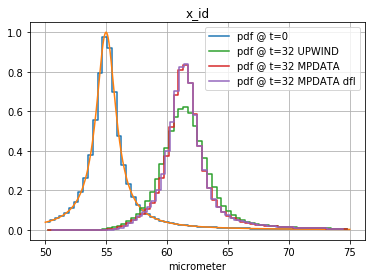

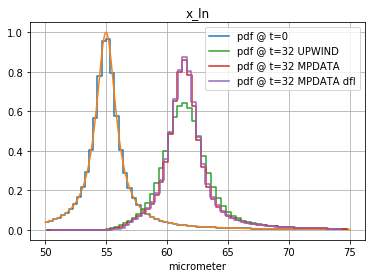

In [299]:
for fn in (x_id, x_ln): # TODO: x_p2
    algos = (
        MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"n_it":1}),
        MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"n_it":2, "dfl":False}),
        MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"n_it":2, "dfl":True})
    )

    plot_step(algos[0].r, algos[0].pdf, "pdf @ t=0")

    for algo in algos:
        for t in range(nt): 
            algo.step(drdt)

    plot_pdfr(r_min, r_max, cdf0)
    plot_step(algos[0].r, algos[0].pdf, "pdf @ t=" + str(nt) + " UPWIND")
    plot_step(algos[1].r, algos[1].pdf, "pdf @ t=" + str(nt) + " MPDATA")
    plot_step(algos[2].r, algos[2].pdf, "pdf @ t=" + str(nt) + " MPDATA dfl")
    plot_done(fn.__name__)